In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import california_housing
from sklearn.cluster import KMeans
import keras

%matplotlib inline 

In [47]:
TRAIN_FILE = "./train.csv"
TEST_FILE = "./test.csv"

In [112]:
df = pd.read_csv(TRAIN_FILE)
df_test = pd.read_csv(TEST_FILE)

In [113]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis='columns')
df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis='columns')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [116]:
df[df.Age.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [117]:
sex_dummies = pd.get_dummies(df.Sex).drop(columns='female', axis='columns')
sex_dummies_test = pd.get_dummies(df_test.Sex).drop(columns='female', axis='columns')

In [118]:
df = df.join(sex_dummies)
df.drop(columns='Sex', axis='columns', inplace=True)

df_test = df_test.join(sex_dummies)
df_test.drop(columns='Sex', axis='columns', inplace=True)

In [119]:
df['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

In [120]:
def correct_age(age, p_class):
    
    if np.isnan(age):
        age = 26
        if p_class == 1:
            age = 39
        elif p_class == 2:
            age = 30
            
    return age       

df['Age'] = df.apply(lambda x: correct_age(x['Age'], x['Pclass']), axis=1)
df_test['Age'] = df_test.apply(lambda x: correct_age(x['Age'], x['Pclass']), axis=1)

In [121]:
def convert_to_bool(x):
    
    rel = 0
    if x != 0:
        rel = 1
        
    return rel

df['ralitives'] = (df.SibSp + df.Parch)
df['ralitives'] = df['ralitives'].apply(convert_to_bool)

df_test['ralitives'] = (df_test.SibSp + df_test.Parch)
df_test['ralitives'] = df_test['ralitives'].apply(convert_to_bool)

In [122]:
df.drop(columns=['SibSp', 'Parch'], axis='columns', inplace=True)

df_test.drop(columns=['SibSp', 'Parch'], axis='columns', inplace=True)

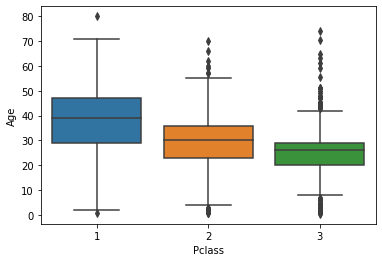

In [123]:
sns.boxplot(x=df.Pclass, y=df.Age, data=df)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Age        891 non-null    float64
 3   Fare       891 non-null    float64
 4   Embarked   891 non-null    object 
 5   male       891 non-null    uint8  
 6   ralitives  891 non-null    int64  
dtypes: float64(2), int64(3), object(1), uint8(1)
memory usage: 42.8+ KB


In [125]:
embarked_dummies = pd.get_dummies(df.Embarked).drop(columns='Q', axis='columns')
df = df.join(embarked_dummies)

embarked_dummies_test = pd.get_dummies(df_test.Embarked).drop(columns='Q', axis='columns')
df_test = df_test.join(embarked_dummies_test)

In [126]:
df.drop(columns=['Embarked'], axis=0, inplace=True)

df_test.drop(columns=['Embarked'], axis=0, inplace=True)

In [127]:
pclass_dummies = pd.get_dummies(df['Pclass'], prefix='Class')
pclass_dummies.drop(columns='Class_1', axis=0, inplace=True)
df = df.join(pclass_dummies)
df.drop(columns='Pclass', axis=0, inplace=True)

pclass_dummies_test = pd.get_dummies(df_test['Pclass'], prefix='Class')
pclass_dummies_test.drop(columns='Class_1', axis=0, inplace=True)
df_test = df_test.join(pclass_dummies_test)
df_test.drop(columns='Pclass', axis=0, inplace=True)

In [128]:
df.corr(method='pearson')

,Survived,Age,Fare,male,ralitives,C,S,Class_2,Class_3
Survived,1.000000,-0.052988,0.257307,-0.543351,0.203367,0.168240,-0.149683,0.093349,-0.322308
Age,-0.052988,1.000000,0.118649,0.081748,-0.174428,0.042895,0.001176,0.016778,-0.342267
Fare,0.257307,0.118649,1.000000,-0.182333,0.271832,0.269335,-0.162184,-0.118557,-0.413333
male,-0.543351,0.081748,-0.182333,1.000000,-0.303646,-0.082853,0.119224,-0.064746,0.137143
ralitives,0.203367,-0.174428,0.271832,-0.303646,1.000000,0.095298,-0.029074,0.039070,-0.129472
C,0.168240,0.042895,0.269335,-0.082853,0.095298,1.000000,-0.782742,-0.125416,-0.153329
S,-0.149683,0.001176,-0.162184,0.119224,-0.029074,-0.782742,1.000000,0.189980,-0.015104
Class_2,0.093349,0.016778,-0.118557,-0.064746,0.039070,-0.125416,0.189980,1.000000,-0.565210
Class_3,-0.322308,-0.342267,-0.413333,0.137143,-0.129472,-0.153329,-0.015104,-0.565210,1.000000


In [129]:
df.head()

,Survived,Age,Fare,male,ralitives,C,S,Class_2,Class_3
0,0,22.0,7.2500,1,1,0,1,0,1
1,1,38.0,71.2833,0,1,1,0,0,0
2,1,26.0,7.9250,0,0,0,1,0,1
3,1,35.0,53.1000,0,1,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,1


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [107]:
DT = DecisionTreeClassifier()

In [141]:
from sklearn.preprocessing import StandardScaler

y_train = df['Survived']
X_train = df.drop(columns='Survived', axis=0)

#y_test = df_test['Survived']
#X_test = df_test

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [142]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [143]:
DT_prediction = DT.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [144]:
accuracy_score(y_test, DT_prediction)

0.7661016949152543

In [145]:
knn = KNeighborsClassifier(n_neighbors = 10, leaf_size=10)
knn.fit(X_train, y_train)
KNN_prediction = knn.predict(X_test)
knn_scores = cross_val_score(knn, X_test, y_test, cv=5)
print("Accuracy Score: ", accuracy_score(y_test, KNN_prediction))
print("Accuracy: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

Accuracy Score:  0.7932203389830509
Accuracy: 0.76 (+/- 0.04)


In [146]:
n_estimators = [6, 10, 20, 50, 100, 120, 160]
#n_neighbors = [1, 3, 5, 10]
max_depth = [2, 6, 12, 18, 24, 50, 100]
random_state = [0, 2, 15, 20, 32, 42]
#leaf_size = [0, 10, 20 , 30, 50, 100]
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'random_state': random_state}
#hyperparams = {'n_neighbors': n_neighbors, 'leaf_size': leaf_size}

gd = GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, verbose=True, cv=10, scoring = "roc_auc", n_jobs=-1)
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 294 candidates, totalling 2940 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 2917 out of 2940 | elapsed:   43.6s remaining:    0.3s


0.8496980754417827
RandomForestClassifier(max_depth=6, n_estimators=20, random_state=15)


[Parallel(n_jobs=-1)]: Done 2940 out of 2940 | elapsed:   44.1s finished


In [135]:
df_test.fillna(df.Fare.mean(), inplace=True)

In [136]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        418 non-null    float64
 1   Fare       418 non-null    float64
 2   male       418 non-null    uint8  
 3   ralitives  418 non-null    int64  
 4   C          418 non-null    uint8  
 5   S          418 non-null    uint8  
 6   Class_2    418 non-null    uint8  
 7   Class_3    418 non-null    uint8  
dtypes: float64(2), int64(1), uint8(5)
memory usage: 12.0 KB


In [147]:
RFC = RandomForestClassifier(max_depth=6, n_estimators=20, random_state=15)
RFC.fit(X_train, y_train)

RFC_prediction = RFC.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, RFC_prediction))
from sklearn.model_selection import cross_val_score
RFC_scores = cross_val_score(RFC, X_test, y_test, cv=5)
print("Cross-Validation score: ", RFC_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (RFC_scores.mean(), RFC_scores.std() * 2))

Accuracy Score:  0.7796610169491526
Cross-Validation score:  [0.84745763 0.77966102 0.81355932 0.84745763 0.88135593]
Accuracy: 0.83 (+/- 0.07)


In [77]:
X_train.shape

(596, 8)

In [148]:
model = keras.Sequential([
    keras.layers.Dense(8, input_dim=8, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [149]:
model.fit(X_train, y_train, epochs=70)

Epoch 1/70
596/596 [==============================] - 1s 1ms/step - loss: 0.6781 - accuracy: 0.6040
Epoch 2/70
596/596 [==============================] - 0s 131us/step - loss: 0.6464 - accuracy: 0.6275
Epoch 3/70
596/596 [==============================] - 0s 130us/step - loss: 0.6134 - accuracy: 0.6275
Epoch 4/70
596/596 [==============================] - 0s 121us/step - loss: 0.5861 - accuracy: 0.6275
Epoch 5/70
596/596 [==============================] - 0s 150us/step - loss: 0.5646 - accuracy: 0.6275
Epoch 6/70
596/596 [==============================] - 0s 132us/step - loss: 0.5475 - accuracy: 0.6275
Epoch 7/70
596/596 [==============================] - 0s 127us/step - loss: 0.5385 - accuracy: 0.6477
Epoch 8/70
596/596 [==============================] - 0s 131us/step - loss: 0.5313 - accuracy: 0.7886
Epoch 9/70
596/596 [==============================] - 0s 150us/step - loss: 0.5240 - accuracy: 0.8171
Epoch 10/70
596/596 [==============================] - 0s 164us/step - loss: 0.5173 

In [150]:
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('\nТочность на проверочных данных:', test_acc)

295/295 [==============================] - 0s 342us/step

Точность на проверочных данных: 0.7898305058479309


In [140]:
# temp = pd.DataFrame(pd.read_csv("test.csv")['PassengerId'])
# temp['Survived'] = RFC_prediction
# temp.to_csv("submission.csv", index = False)